# LMC number of coefficients:

1. Compute with gadget snapshots with only the LMC at the present time
2. Compute the expansions using all the terms and look how many terms are needed to have low errors in a.
3. Re-do a but with the MW Dm partiles so see the overall error.

In [86]:
%pylab inline
import jellyfish
import biff
import pygadgetreader
import coeff_noise

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
G_gadget=43007.1

In [4]:
## Reading coefficients 
coeff_lmc = np.loadtxt('./LMC/coeff_rand_40lmc5_b1_1E6_1.txt')
S_lmc = coeff_lmc[:,0]
T_lmc = coeff_lmc[:,1]

S_lmc_1e6 = np.zeros((41, 21, 21))
T_lmc_1e6 = np.zeros((41, 21, 21))


counter = 0
for n in range(41):
    for l in range(21):
        for m in range(0, l+1):
            S_lmc_1e6[n][l][m] = S_lmc[counter]
            T_lmc_1e6[n][l][m] = T_lmc[counter]
            counter +=1

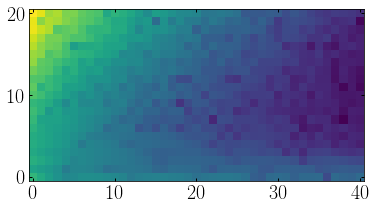

In [5]:
imshow(np.log10(np.abs(S_lmc_1e6[:,:,0])).T, origin='lower')

In [65]:
y_grid = np.arange(-300, 300, 5.5)
z_grid = np.arange(-300, 300, 5.5)
y_grid, z_grid = meshgrid(y_grid, z_grid)

In [66]:
xyz = np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())),
                                     y_grid.flatten(), z_grid.flatten()]).T)

In [67]:
rho_lmc1 = biff.density(xyz, S_lmc_1e6, T_lmc_1e6, M=1, r_s=10)

In [68]:
pot_lmc1 = biff.potential(xyz, S_lmc_1e6, T_lmc_1e6, M=1, r_s=10, G=G_gadget)

In [69]:
a_lmc1 = biff.gradient(xyz, S_lmc_1e6, T_lmc_1e6, M=1, r_s=10, G=G_gadget)

In [70]:
index1 = isnan(a_lmc1[:,0])
index2 = isnan(a_lmc1[:,1])
index3 = isnan(a_lmc1[:,2])

In [71]:
a_lmc1[index1,0] = 0
a_lmc1[index1,1] = 0
a_lmc1[index1,2] = 0

In [72]:
a_all = np.sqrt(a_lmc1[:,0]**2 + a_lmc1[:,1]**2 + a_lmc1[:,2]**2)

In [73]:
len(y_grid)

110

In [56]:
np.log10(a_all.reshape((86, 86)))[:,60]

array([ -1.60932669e-01,  -1.42132823e-01,  -1.22958597e-01,
        -1.03398831e-01,  -8.34421384e-02,  -6.30768884e-02,
        -4.22912056e-02,  -2.10730049e-02,   5.89907585e-04,
         2.27096182e-02,   4.52977073e-02,   6.83645815e-02,
         9.19184255e-02,   1.15963650e-01,   1.40498702e-01,
         1.65513139e-01,   1.90983895e-01,   2.16870803e-01,
         2.43111555e-01,   2.69616495e-01,   2.96263824e-01,
         3.22896001e-01,   3.49318216e-01,   3.75299914e-01,
         4.00580334e-01,   4.24879162e-01,   4.47913396e-01,
         4.69421105e-01,   4.89191016e-01,   5.07093106e-01,
         5.23100534e-01,   5.37291612e-01,   5.49827243e-01,
         5.60913219e-01,   5.70762898e-01,   5.79556383e-01,
         5.87366497e-01,   5.94061282e-01,   5.99299381e-01,
         6.02712147e-01,   6.04123484e-01,   6.03549723e-01,
         6.00997327e-01,   5.96370451e-01,   5.89649806e-01,
         5.81040360e-01,   5.70789979e-01,   5.58955870e-01,
         5.45482152e-01,

In [59]:
lmc_data = loadtxt('./LMC/LMC_100M_b1_dm_part_1e6.txt')

In [60]:
len(lmc_data)

1000000

In [61]:
lmc_data[:,0]

array([ -6.72479534,  -0.86846876,  44.59864426, ..., -24.38514137,
         5.61275816,  -2.9104414 ])

In [62]:
nrand = np.random.randint(0, 1000000, 10000)

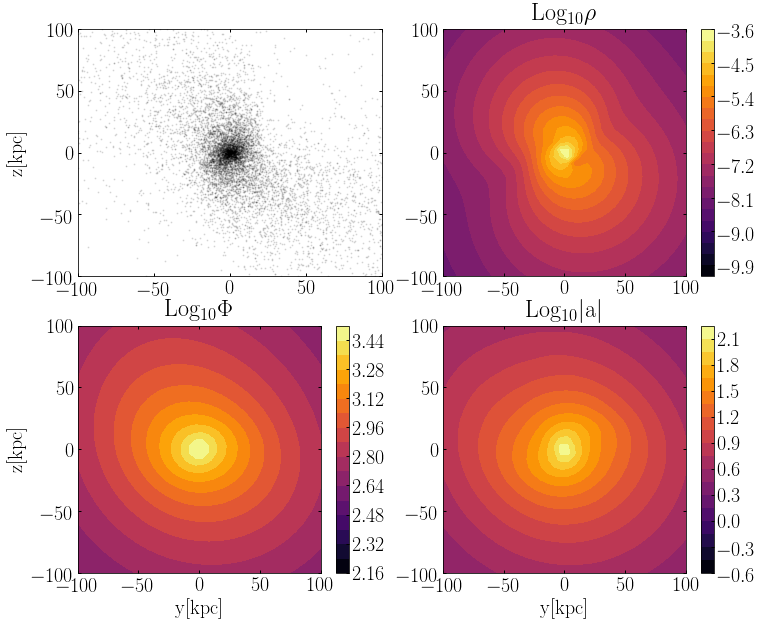

In [82]:
fig, ax = subplots(2, 2, figsize=(12, 10))

bins = 110

ax[0][0].scatter(lmc_data[nrand,1], lmc_data[nrand,2], c='k', s=1, alpha=0.1)


im1 = ax[0][1].contourf(y_grid, z_grid, np.log10(np.abs(rho_lmc1.reshape(bins, bins))), 20,
         origin='lower', cmap='inferno')

ax[1][1].set_xlabel('y[kpc]')
ax[0][0].set_ylabel('z[kpc]')
ax[1][0].set_ylabel('z[kpc]')
ax[1][0].set_xlabel('y[kpc]')


fig.colorbar(im1, ax=ax[0][1])

im2 = ax[1][0].contourf(y_grid, z_grid, np.log10(np.abs(pot_lmc1.reshape(bins, bins).T)), 20,
                        origin='lower', cmap='inferno')


fig.colorbar(im2, ax=ax[1][0])


im3 = ax[1][1].contourf(y_grid, z_grid, np.log10((np.abs(a_all.reshape(bins, bins).T))), 20,
                        origin='lower', cmap='inferno')

fig.colorbar(im3, ax=ax[1][1])


ax[0][0].set_xlim(-100, 100)
ax[0][0].set_ylim(-100, 100)

ax[0][1].set_xlim(-100, 100)
ax[0][1].set_ylim(-100, 100)

ax[1][0].set_xlim(-100, 100)
ax[1][0].set_ylim(-100, 100)

ax[1][1].set_xlim(-100, 100)
ax[1][1].set_ylim(-100, 100)

ax[0][1].set_title(r'$\rm{Log_{10}} \rho$')
ax[1][0].set_title(r'$\rm{Log_{10}} \Phi$')
ax[1][1].set_title(r'$\rm{Log_{10}} |a|$')

#colorbar()
savefig('LMC_bfe.pdf')

In [ ]:
# How different is the potential from a Hernquist sphere?

In [75]:
def coeff_matrix(S, T, nmax, lmax, mmax):
    """
    
    """
    S_cut = np.zeros(shape(S))
    T_cut = np.zeros(shape(T))
    for n in range(nmax):
        for l in range(lmax):
            for m in range(mmax):
                S_cut[n,l,m] = S[n,l,m]
                T_cut[n,l,m] = T[n,l,m]
    return S_cut, T_cut

In [76]:
S_cut, T_cut = coeff_matrix(S_lmc_1e6, T_lmc_1e6, 4, 4, 4)

In [78]:
rho_cut = biff.density(xyz, S_cut, T_cut, M=1, r_s=10)
pot_cut = biff.potential(xyz, S_cut, T_cut, M=1, r_s=10, G=G_gadget)
a_cut = biff.gradient(xyz, S_cut, T_cut, M=1, r_s=10, G=G_gadget)

In [84]:
a_cut_all = (a_cut[:,0]**2 + a_cut[:,1]**2 + a_cut[:,2]**2)**0.5

Text(0.5,1,'$\\rm{Log_{10}} |a|$')

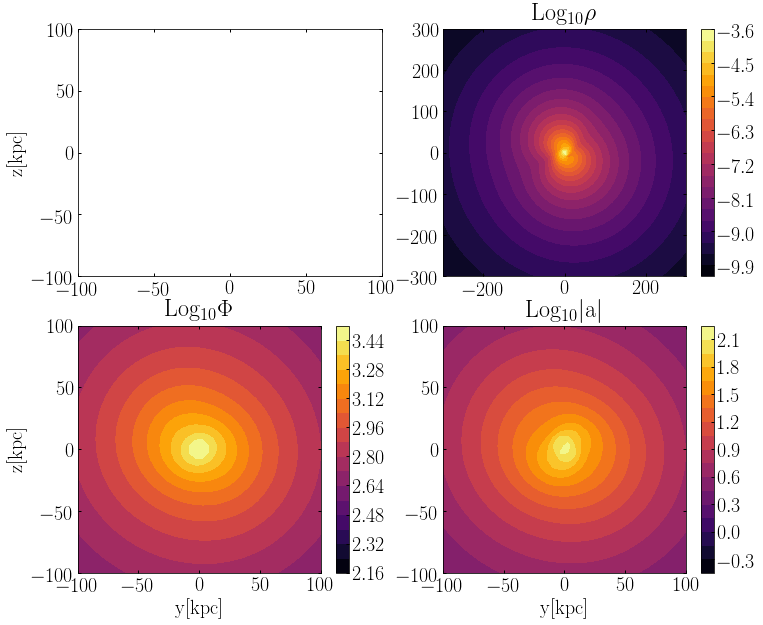

In [85]:
fig, ax = subplots(2, 2, figsize=(12, 10))

bins = 110

im1 = ax[0][1].contourf(y_grid, z_grid, np.log10(np.abs(rho_cut.reshape(bins, bins))), 20,
         origin='lower', cmap='inferno')

ax[1][1].set_xlabel('y[kpc]')
ax[0][0].set_ylabel('z[kpc]')
ax[1][0].set_ylabel('z[kpc]')
ax[1][0].set_xlabel('y[kpc]')


fig.colorbar(im1, ax=ax[0][1])

im2 = ax[1][0].contourf(y_grid, z_grid, np.log10(np.abs(pot_cut.reshape(bins, bins).T)), 20,
                        origin='lower', cmap='inferno')


fig.colorbar(im2, ax=ax[1][0])


im3 = ax[1][1].contourf(y_grid, z_grid, np.log10((np.abs(a_cut_all.reshape(bins, bins).T))), 20,
                        origin='lower', cmap='inferno')

fig.colorbar(im3, ax=ax[1][1])


ax[0][0].set_xlim(-100, 100)
ax[0][0].set_ylim(-100, 100)

ax[1][0].set_xlim(-100, 100)
ax[1][0].set_ylim(-100, 100)

ax[1][1].set_xlim(-100, 100)
ax[1][1].set_ylim(-100, 100)

ax[0][1].set_title(r'$\rm{Log_{10}} \rho$')
ax[1][0].set_title(r'$\rm{Log_{10}} \Phi$')
ax[1][1].set_title(r'$\rm{Log_{10}} |a|$')



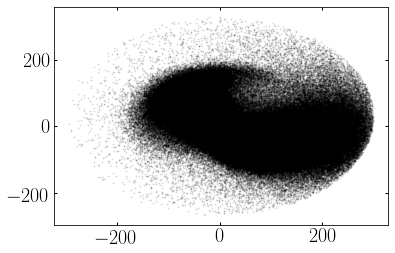

In [18]:
scatter(lmc_data[:,1], lmc_data[:,2], c='k', s=1, alpha=0.1)


In [34]:
a_all.reshape((120, 120))[0]

array([ 0.35221041,  0.35804197,  0.36397203,  0.37000072,  0.37612805,
        0.38235386,  0.38867782,  0.39509942,  0.40161796,  0.40823254,
        0.41494202,  0.42174507,  0.42864006,  0.43562513,  0.44269815,
        0.44985669,  0.457098  ,  0.46441902,  0.47181636,  0.47928625,
        0.48682457,  0.49442678,  0.50208796,  0.50980274,  0.5175653 ,
        0.52536937,  0.53320819,  0.54107449,  0.54896051,  0.55685795,
        0.56475798,  0.57265124,  0.58052784,  0.58837735,  0.59618882,
        0.60395083,  0.61165146,  0.61927837,  0.62681883,  0.63425975,
        0.64158776,  0.64878925,  0.65585043,  0.66275743,  0.66949631,
        0.67605314,  0.68241409,  0.68856546,  0.69449371,  0.70018555,
        0.70562795,  0.71080817,  0.71571383,  0.72033292,  0.72465382,
        0.72866539,  0.73235698,  0.73571847,  0.73874038,  0.74141392,
        0.        ,  0.74568456,  0.74726822,  0.74847676,  0.74930604,
        0.74975305,  0.749816  ,  0.74949438,  0.74878893,  0.74

In [28]:
a_all[a_all == 'nan'] = 0

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [32]:
where_are_NaNs = isnan(a_all)
a_all[where_are_NaNs] = 0